In [3]:
using Graphs
using Random

In [42]:
function removeNodes(g::Graph, f::Float64, strategy::String)
    nodes = collect(vertices(g))
    if strategy == "random"
        nodes = shuffle(nodes)
    elseif strategy == "degree"
        node_degree = degree(g)
        sort!(nodes, by = x -> node_degree[x], rev = true)
    end
    for i in 1:round(Int, length(nodes)*f)
        rem_vertex!(g, nodes[i])
    end
    return g
end

removeNodes (generic function with 3 methods)

In [59]:
n = 10^4
L = 10^3

k = [1, 2]
f = 0.00:0.02:1.0
y_rand = zeros(length(k), length(f))
y_deg = zeros(length(k), length(f))

for i in 1:length(k)
    for j in 1:length(f)
        for l in 1:L
            g = barabasi_albert(n, k[i])
            giant_pre = maximum([length(cc) for cc in connected_components(g)])
            g = removeNodes(g, f[j], "random")
            giant_post = maximum([length(cc) for cc in connected_components(g)])
            y_rand[i, j] += (giant_post/giant_pre)/L

            g = barabasi_albert(n, k[i])
            giant_pre = maximum([length(cc) for cc in connected_components(g)])
            g = removeNodes(g, f[j], "degree")
            giant_post = maximum([length(cc) for cc in connected_components(g)])
            y_deg[i, j] += (giant_post/giant_pre)/L
        end
    end
end

In [60]:
using JLD2
save("network_robustness_ba.jld2", "n", n, "L", L, "k", k.*2, "f", f, "y_rand", y_rand, "y_deg", y_deg)

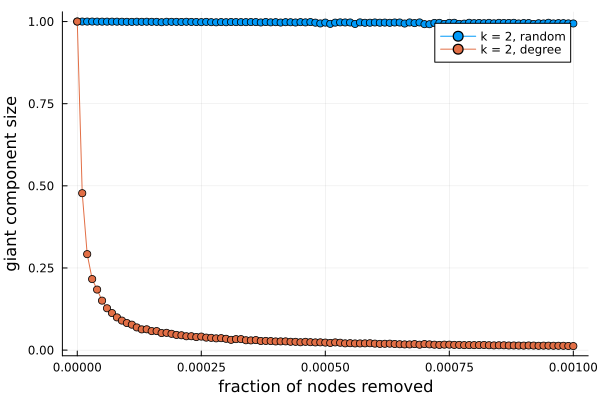

In [55]:
using Plots
plot(f, y_rand[1, :], label = "k = 2, random", xlabel = "fraction of nodes removed", ylabel = "giant component size", legend = :topright, markershape = :circle)
plot!(f, y_deg[1, :], label = "k = 2, degree", xlabel = "fraction of nodes removed", ylabel = "giant component size", markershape = :circle)

Fig 1. Size of the giant component after removal of nodes, presented as $\frac{P(f)}{P(0)}$, where $f$ is a fraction of nodes removed. Results for the Barabasi-Albert network with $N = 10^5, L = 10^2$.


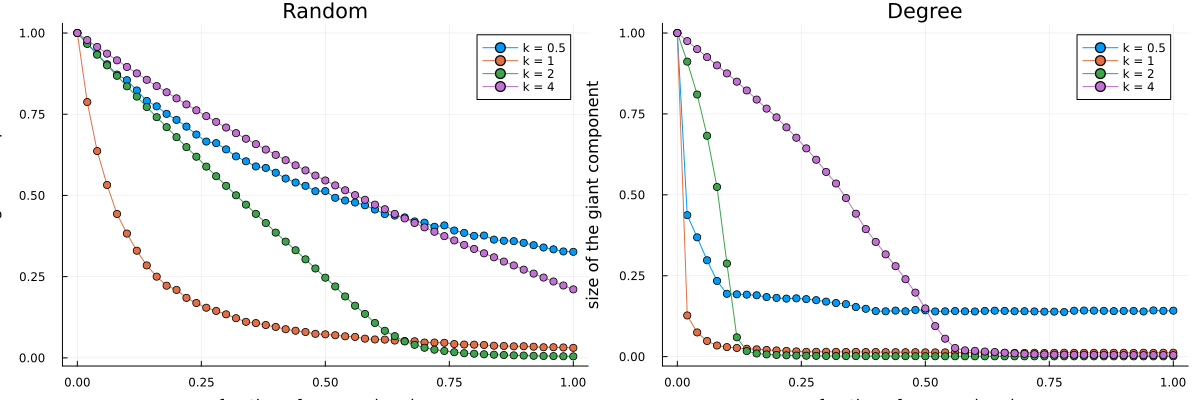

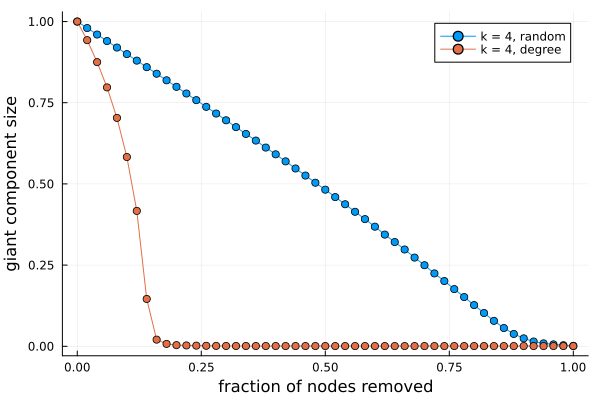

In [62]:
plot(f, y_rand[2, :], label = "k = 4, random", xlabel = "fraction of nodes removed", ylabel = "giant component size", legend = :topright, markershape = :circle)
plot!(f, y_deg[2, :], label = "k = 4, degree", xlabel = "fraction of nodes removed", ylabel = "giant component size", markershape = :circle)

In [63]:
n = 10^4
L = 10^3

k = [0.5, 1.0, 2.0, 4.0]
f = 0.00:0.02:1.0
y_rand = zeros(length(k), length(f))
y_deg = zeros(length(k), length(f))

for i in 1:length(k)
    for j in 1:length(f)
        for l in 1:L
            g = erdos_renyi(n, k[i]/n)
            giant_pre = maximum([length(cc) for cc in connected_components(g)])
            g = removeNodes(g, f[j], "random")
            giant_post = maximum([length(cc) for cc in connected_components(g)])
            y_rand[i, j] += (giant_post/giant_pre)/L

            g = erdos_renyi(n, k[i]/n)
            giant_pre = maximum([length(cc) for cc in connected_components(g)])
            g = removeNodes(g, f[j], "degree")
            giant_post = maximum([length(cc) for cc in connected_components(g)])
            y_deg[i, j] += (giant_post/giant_pre)/L
        end
    end
end

In [64]:
save("network_robustness_er.jld2", "n", n, "L", L, "k", k.*2, "f", f, "y_rand", y_rand, "y_deg", y_deg)

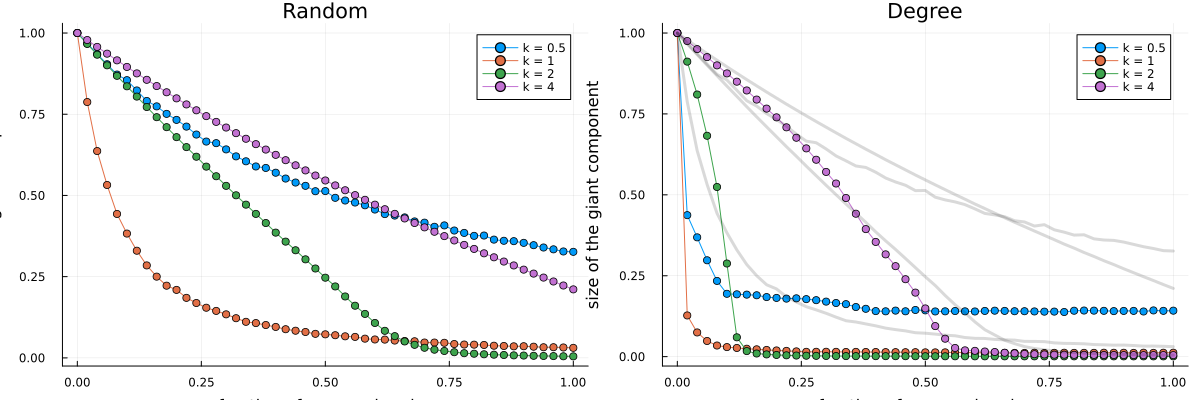

In [79]:
pl1 = plot(f, y_rand[1, :], title = "Random", label = "k = 0.5", ylabel = "size of the giant component", xlabel = "fraction of removed nodes", legend = :topright, 
markershape = :circle)
plot!(pl1, f, y_rand[2, :], label = "k = 1", markershape = :circle)
plot!(pl1, f, y_rand[3, :], label = "k = 2", markershape = :circle)
plot!(pl1, f, y_rand[4, :], label = "k = 4", markershape = :circle)

pl2 = plot(f, y_deg[1, :], title = "Degree", label = "k = 0.5", ylabel = "size of the giant component", xlabel = "fraction of removed nodes", legend = :topright, 
markershape = :circle)
plot!(pl2, f, y_deg[2, :], label = "k = 1", markershape = :circle)
plot!(pl2, f, y_deg[3, :], label = "k = 2", markershape = :circle)
plot!(pl2, f, y_deg[4, :], label = "k = 4", markershape = :circle)
plot!(pl2, f, y_rand[1, :], label = "", linestyle = :solid, color = :black, alpha = 0.15, linewidth = 3)
plot!(pl2, f, y_rand[2, :], label = "", linestyle = :solid, color = :black, alpha = 0.15, linewidth = 3)
plot!(pl2, f, y_rand[3, :], label = "", linestyle = :solid, color = :black, alpha = 0.15, linewidth = 3)
plot!(pl2, f, y_rand[4, :], label = "", linestyle = :solid, color = :black, alpha = 0.15, linewidth = 3)

plot(pl1, pl2, layout = (1, 2), size = (1200, 400))